In [1]:
import numpy as np
import theano
import theano.tensor as T
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(0)

In [24]:
#creating test input
numPoints = 200
x = np.linspace(0, 20, numPoints)
data = np.sin(x)
data_rolled = np.roll(data, -1)
x_mat = np.matrix(x).T
data_mat = np.matrix(data).T
resp_mat = np.matrix(data_rolled).T
eta_val = 0.2

In [15]:
numPoints = 200
startTime = 0
stopTime = 20
time = np.linspace(startTime, stopTime, num=numPoints)
x = np.sin(time)
data = pd.DataFrame({"data":x, "response":x})
data.response = data.response.shift(-1)
#Not selecting the last point since the response is a Nan
data = data.iloc[:-1]

In [16]:
def _load_data(data, n_prev = 3):  
    """
    data should be pd.DataFrame()
    """

    docX, docY = [], []
    for i in range(len(data)-n_prev):
        docX.append(data.data.iloc[i:i+n_prev])
        docY.append(data.response.iloc[i+n_prev-1])
    alsX = np.array(docX)
    alsY = np.array(docY)

    return np.matrix(alsX), np.matrix(alsY).T

In [22]:
data_mat, resp_mat = _load_data(data)

In [18]:
resp_mat.shape

(196, 1)

In [10]:
from layers import LSTMLayer, InputLayer, FullyConnectedLayer
from lib import get_params, make_caches, SGD, momentum

In [ ]:
h,s = lstm.forward_step(np.ones(num_input), \
                        np.ones(num_cells), np.ones(num_cells))

In [30]:
num_input = 1
num_cells = 5
num_output = 1
X = T.matrix('x')
Y = T.matrix('y')
eta = T.scalar('eta')
alpha = T.scalar('alpha')
inputs = InputLayer(X, name="inputs")
lstm = LSTMLayer(num_input, num_cells, input_layer=inputs, name="lstm")
fc = FullyConnectedLayer(num_cells, num_output, input_layer=lstm)
Y_hat = T.mean(fc.output(), axis=2)
layer = inputs, lstm, fc
params = get_params(layer)
caches = make_caches(params)
mean_cost = T.mean((Y - Y_hat)**2)
last_cost = T.mean((Y[-1] - Y_hat[-1])**2)
#To run SGD uncomment below and comment momentum line
#updates = SGD(cost, params, eta, lambda2=0.1)
cost = alpha*mean_cost + (1-alpha)*last_cost
updates = momentum(cost, params, caches, eta, clip_at=3.0)
train = theano.function([X, Y, eta, alpha], [cost, last_cost] , updates=updates,\
                       allow_input_downcast=True)
costfn = theano.function([X, Y, alpha], [cost, last_cost], allow_input_downcast=True)
predict = theano.function([X], [Y_hat], allow_input_downcast=True)

In [26]:
costfn(data_mat, resp_mat, 1.0)

[array(0.49015372077586067), array(3.146540219285348e-08)]

In [57]:
lstm.W_fx.eval()

array([[-0.00323161,  0.00242587,  0.0099474 , -0.00138729, -0.00027877,
         0.00440768, -0.00982352, -0.01641294, -0.01847433,  0.00753694,
        -0.01076163,  0.00110762, -0.00789088,  0.00871257, -0.01722764,
        -0.00207719,  0.01256239,  0.0091235 , -0.0021716 , -0.01099967]])

In [29]:
data_mat.shape, resp_mat.shape

((200, 1), (200, 1))

In [33]:
n_iterations = 1000
for i in range(n_iterations):
    r_cost = train(data_mat, resp_mat, 0.5, 1.0)
    if i%10 == 0:
        print "iteration: %s, cost: %s" % (i, float(r_cost[0]))

iteration: 0, cost: 0.396625103602
iteration: 10, cost: 0.387844788001
iteration: 20, cost: 0.385990837057
iteration: 30, cost: 0.384855513423
iteration: 40, cost: 0.384634309244
iteration: 50, cost: 0.384407329301
iteration: 60, cost: 0.384249195743
iteration: 70, cost: 0.384088155023
iteration: 80, cost: 0.383941078718
iteration: 90, cost: 0.383796661511
iteration: 100, cost: 0.383656019685
iteration: 110, cost: 0.383517453745
iteration: 120, cost: 0.383381111754
iteration: 130, cost: 0.383246742878
iteration: 140, cost: 0.383114315044
iteration: 150, cost: 0.38298373813
iteration: 160, cost: 0.382854953206
iteration: 170, cost: 0.382727896361
iteration: 180, cost: 0.382602510383
iteration: 190, cost: 0.382478740905
iteration: 200, cost: 0.382356537626
iteration: 210, cost: 0.382235853726
iteration: 220, cost: 0.382116645757
iteration: 230, cost: 0.381998873426
iteration: 240, cost: 0.381882499364
iteration: 250, cost: 0.381767488862
iteration: 260, cost: 0.381653809629
iteration: 27

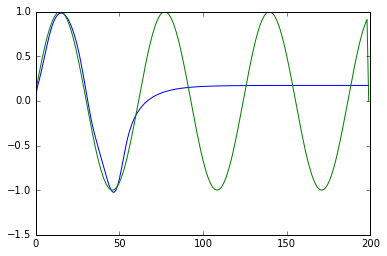

In [35]:
plt.plot(predict(x_mat)[0])
plt.plot(resp_mat)

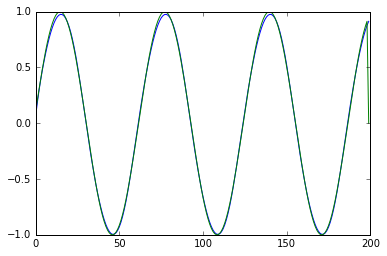

In [28]:
plt.plot(predict(data_mat)[0])
plt.plot(resp_mat)

#### Testing Regular time series with basic_lstm.py

In [3]:
import numpy as np
#Setting the seed before other dependent imports
np.random.seed(0)

In [79]:
import theano
import theano.tensor as T
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from layers import LSTMLayer, InputLayer, FullyConnectedLayer
from lib import get_params, make_caches, SGD, momentum
from basic_lstm import basicLSTM

In [5]:
def _load_data(data, n_prev = 3):  
    """
    data should be pd.DataFrame()
    """

    docX, docY = [], []
    for i in range(len(data)-n_prev):
        docX.append(data.data.iloc[i:i+n_prev])
        docY.append(data.response.iloc[i+n_prev-1])
    alsX = np.array(docX)
    alsY = np.array(docY)

    return np.matrix(alsX), np.matrix(alsY).T

In [4]:
numPoints = 200
startTime = 0
stopTime = 20
time = np.linspace(startTime, stopTime, num=numPoints)
x = np.sin(time)
data = pd.DataFrame({"data":x, "response":x})
data.response = data.response.shift(-1)
#Not selecting the last point since the response is a Nan
data = data.iloc[:-1]

In [23]:
n_prev = 3
data_mat, resp_mat = _load_data(data, n_prev=n_prev)

In [6]:
lstm_model = basicLSTM(n_prev)

In [7]:
lstm_model.costfn(data_mat, resp_mat, 1.0)

[array(0.5002794491115484), array(0.8344074788520265)]

In [8]:
n_iterations = 100
for i in range(n_iterations):
    r_cost = lstm_model.train(data_mat, resp_mat, 0.5, 1.0)
    if i%10 == 0:
        print "iteration: %s, cost: %s" % (i, float(r_cost[0]))

iteration: 0, cost: 0.500279449112
iteration: 10, cost: 0.481134582443
iteration: 20, cost: 0.227940707387
iteration: 30, cost: 0.14098215336
iteration: 40, cost: 0.0886761005109
iteration: 50, cost: 0.0617232088905
iteration: 60, cost: 0.0543155208358
iteration: 70, cost: 0.0506504974447
iteration: 80, cost: 0.0468086099211
iteration: 90, cost: 0.0431522004036


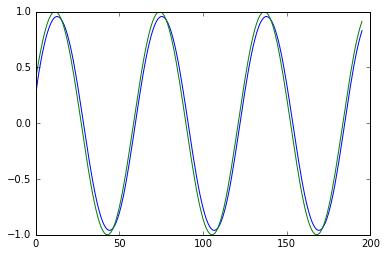

In [15]:
plt.plot(lstm_model.predict(data_mat)[0])
plt.plot(resp_mat)

#### Regular interval with noise

In [12]:
def data_generation_noise(stopTime, numPoints, n_prev, noiseSD):
    """
    Inputs:
    stopTime - stop time for the sine series
    numPoints - Resolution
    n_prev - previous points to include for prediction
    """
    noise = np.random.normal(loc=0, scale=noiseSD ,size=numPoints)
    if n_prev > 1:
        startTime = 0
        time_vec = np.linspace(startTime, stopTime, num=numPoints)
        x = np.sin(time_vec) + noise
        data = pd.DataFrame({"data":x, "response":x})
        data.response = data.response.shift(-1)
        #Not selecting the last point since the response is a Nan
        data = data.iloc[:-1]
        data_mat, resp_mat = _load_data(data, n_prev=n_prev)
    else:
        time_vec = np.linspace(0, 20, numPoints)
        data = np.sin(time_vec) + noise
        data_rolled = np.roll(data, -1)[:-1]
        data_mat = np.matrix(data[:-1]).T
        resp_mat = np.matrix(data_rolled).T
    return data_mat, resp_mat, time_vec[n_prev:]

In [13]:
stopTime = 20
numPoints = 200
n_prev = 1
data_mat, resp_mat, time_vec = data_generation_noise(stopTime, numPoints, n_prev, 0.2)

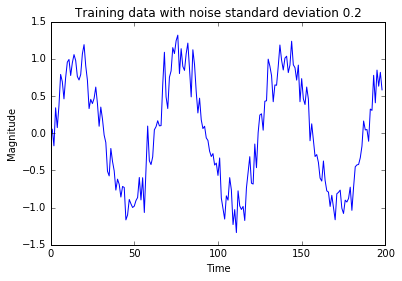

In [97]:
plt.plot(data_mat)
plt.title('Training data with noise standard deviation 0.2')
plt.xlabel('Time')
plt.ylabel('Magnitude')

In [35]:
np.arange(0.1,1+0.1,0.1)

array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ])

In [21]:
lstm_model = basicLSTM(n_prev)

In [22]:
n_iterations = 100
for i in range(n_iterations):
    r_cost = lstm_model.train(data_mat, resp_mat, 0.5, 1.0)
    if i%10 == 0:
        print "iteration: %s, cost: %s" % (i, float(r_cost[0]))

iteration: 0, cost: 0.471766339099
iteration: 10, cost: 0.466520293439
iteration: 20, cost: 0.442554783808
iteration: 30, cost: 0.286921081171
iteration: 40, cost: 0.0811907638385
iteration: 50, cost: 0.0631095381363
iteration: 60, cost: 0.0701462492078
iteration: 70, cost: 0.062197099202
iteration: 80, cost: 0.060665437294
iteration: 90, cost: 0.0606850145693


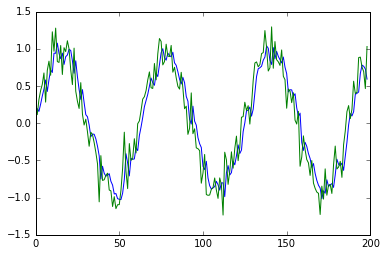

In [23]:
plt.plot(lstm_model.predict(data_mat)[0])
plt.plot(resp_mat)

#### Irregular interval testing

In [1]:
import numpy as np
#Setting the seed before other dependent imports
np.random.seed(0)

In [2]:
import theano
import theano.tensor as T
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from layers import LSTMLayer, InputLayer, FullyConnectedLayer
from lib import get_params, make_caches, SGD, momentum
from basic_lstm import basicLSTM
import random

In [70]:
def basic_irregular(stopTime, numPoints, numSelPoints):
    time = np.linspace(0, stopTime, numPoints)
    data = np.sin(time)
    index = np.sort(np.random.choice(range(numPoints), size=numSelPoints, replace=False))
    time_irr = time[index]
    data_irr = data[index]
    delta_t = [0] + list(np.array(time_irr[1:]) - np.array(time_irr[:-1]))
    data_mat = np.matrix([list(data_irr), delta_t]).T
    data_mat = data_mat[:-1,:]
    resp_mat = np.matrix(np.roll(data_irr, -1)[:-1]).T
    time_vec = time_irr[1:]
    return data_mat, resp_mat, time_vec

In [71]:
stopTime = 20
numPoints = 400
numSelPoints = 60
data_mat, resp_mat, time_vec = basic_irregular(stopTime, numPoints, numSelPoints)

In [105]:
numCellArray = np.arange(5,30,5)

In [111]:
import os
graphs_path = os.path.join(os.getcwd(),'graphs')
store_path = os.path.join(graphs_path, 'irregular-time-intervals')

In [112]:
for num in numCellArray:
    numPath = os.path.join(store_path, str(num)+'cell_states')
    if not os.path.isdir(numPath):
        os.makedirs(numPath)

In [89]:
lstm_model = basicLSTM(2, num_cells=20)

In [98]:
n_iterations = 1000
for i in range(n_iterations):
    r_cost = lstm_model.train(data_mat, resp_mat, 0.3, 1.0)
    if i%100 == 0:
        print "iteration: %s, cost: %s" % (i, float(r_cost[0]))

iteration: 0, cost: 0.0112082859926
iteration: 100, cost: 0.0111366246071
iteration: 200, cost: 0.0111363787474
iteration: 300, cost: 0.0182549749613
iteration: 400, cost: 0.0107180718491
iteration: 500, cost: 0.0106322214573
iteration: 600, cost: 0.0106039927456
iteration: 700, cost: 0.0103316318723
iteration: 800, cost: 0.0103211671069
iteration: 900, cost: 0.0100609590313


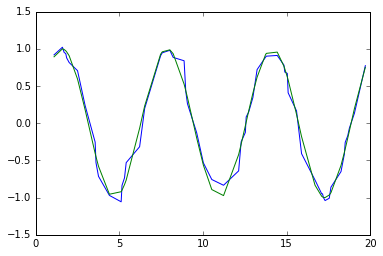

In [99]:
plt.plot(time_vec, lstm_model.predict(data_mat)[0])
plt.plot(time_vec, resp_mat)

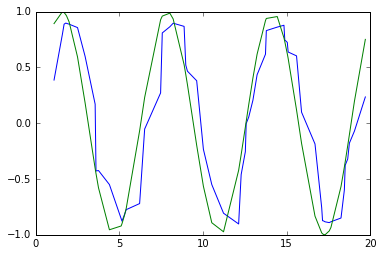

In [74]:
plt.plot(time_vec, lstm_model.predict(data_mat)[0])
plt.plot(time_vec, resp_mat)

#### Irregular time series with velocity/accelaration parameters

In [40]:
def acc_vel_irregular(stopTime, numPoints, numSelPoints):
    time = np.linspace(0, stopTime, numPoints)
    data = np.sin(time)
    index = np.sort(np.random.choice(range(numPoints), size=numSelPoints, replace=False))
    time_irr = time[index]
    data_irr = data[index]
    delta_t = [0] + list(np.array(time_irr[1:]) - np.array(time_irr[:-1]))
    derivative = np.divide(np.diff(data_irr), np.diff(time_irr))
    magDerivative = np.lib.pad(derivative, (1,0), 'constant', constant_values=(0,0))
    dDerivative = np.lib.pad(np.diff(magDerivative), (1,0), 'constant', constant_values=(0,0))
    data_mat = np.matrix([list(data_irr), delta_t, list(magDerivative), list(dDerivative)]).T
    data_mat = data_mat[:-1,:]
    resp_mat = np.matrix(np.roll(data_irr, -1)[:-1]).T
    time_vec = time_irr[1:]
    return data_mat, resp_mat, time_vec

In [41]:
stopTime = 20
numPoints = 400
numSelPoints = 60
data_mat, resp_mat, time_vec = acc_vel_irregular(stopTime, numPoints, numSelPoints)

#### LSTM for LPV's

In [42]:
import os

In [43]:
#only visible files
def listdir_nohidden(path):
    list_files = []
    for f in os.listdir(path):
        if not f.startswith('.'):
            list_files.append(f)
    return list_files

In [165]:
#Getting the list of files
datapath = os.path.join(os.getcwd(), 'data/LPV/')
list_files = listdir_nohidden(datapath)
#suffix = [files.split('.')[3] for files in list_files]
#Starter code when we want to use different bands for analysis
file_sel = list_files[2]
print "Processing LPV file :",file_sel

Processing LPV file : lc_1.3441.25.B.mjd


In [166]:
def acc_vel_irregular_dataset(data):
    np.random.seed()
    data_arr = np.array(data)
    err = np.array(data['Err\n'])
    err_list = []
    for er in err:
        err_list.append(np.random.normal(0,er))
    err_arr = np.array(err_list)
    time_irr = data_arr[:,0] - data_arr[0,0]
    data_mean = np.mean(data_arr[:,1])
    data_irr = data_arr[:,1] + err_arr - data_mean
    delta_t = [0] + list(np.array(time_irr[1:]) - np.array(time_irr[:-1]))
    derivative = np.divide(np.diff(data_irr), np.diff(time_irr))
    magDerivative = np.lib.pad(derivative, (1,0), 'constant', constant_values=(0,0))
    dDerivative = np.lib.pad(np.diff(magDerivative), (1,0), 'constant', constant_values=(0,0))
    data_mat = np.matrix([list(data_irr), delta_t, list(magDerivative), list(dDerivative)]).T
    data_mat = data_mat[:-1,:]
    resp_mat = np.matrix(np.roll(data_irr, -1)[:-1]).T
    time_vec = time_irr[1:]
    return data_mat, resp_mat, time_vec, data_mean

In [167]:
filepath = os.path.join(datapath, file_sel)
data = []
with open(filepath) as f:
    lines = f.readlines()
    header = [str(val) for val in lines[2].split(' ')]
    for line in lines[3:]:
        data.append([float(val) for val in line.split(' ')])
data_df = pd.DataFrame(data)
data_df.columns = header

In [168]:
data_mat, resp_mat, time_vec, data_mean = acc_vel_irregular_dataset(data_df)

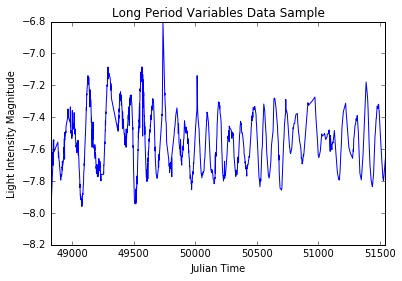

In [169]:
plt.plot(data_df['#MJD'],data_df['Mag'])
plt.title('Long Period Variables Data Sample')
plt.xlabel('Julian Time')
plt.xlim([min(data_df['#MJD']), max(data_df['#MJD'])])
plt.ylabel('Light Intensity Magnitude')

In [174]:
lstm_model = basicLSTM(4, num_cells=50)

In [175]:
n_iterations = 1000
for i in range(n_iterations):
    data_mat, resp_mat, time_vec, data_mean = acc_vel_irregular_dataset(data_df)
    numSelPoints = len(data_df)
    data_mat_tr = data_mat[:numSelPoints/2,:]
    resp_mat_tr = resp_mat[:numSelPoints/2,:]
    r_cost = lstm_model.train(data_mat_tr, resp_mat_tr, 1.0)
    if i%20 == 0:
        print "iteration: %s, cost: %s" % (i, float(r_cost[0]))

iteration: 0, cost: 0.0479948027049
iteration: 20, cost: 0.0464496252051
iteration: 40, cost: 0.0414148270032
iteration: 60, cost: 0.0258237760756
iteration: 80, cost: 0.00875647361333
iteration: 100, cost: 0.00536919944555
iteration: 120, cost: 0.00426441849461
iteration: 140, cost: 0.00353178764954
iteration: 160, cost: 0.0036444335412
iteration: 180, cost: 0.0037852708208
iteration: 200, cost: 0.00319509712812
iteration: 220, cost: 0.00359181623478
iteration: 240, cost: 0.00333244027559
iteration: 260, cost: 0.00345859358328
iteration: 280, cost: 0.00364116678514
iteration: 300, cost: 0.00330133820863
iteration: 320, cost: 0.00327764100759
iteration: 340, cost: 0.00315677157671
iteration: 360, cost: 0.00326661422382
iteration: 380, cost: 0.00337895396535
iteration: 400, cost: 0.00318111086702
iteration: 420, cost: 0.00303651750408
iteration: 440, cost: 0.00325976394377
iteration: 460, cost: 0.00313340395451
iteration: 480, cost: 0.00367069229188
iteration: 500, cost: 0.0029487097267

In [176]:
data_mat, resp_mat, time_vec, data_mean = acc_vel_irregular_dataset(data_df)

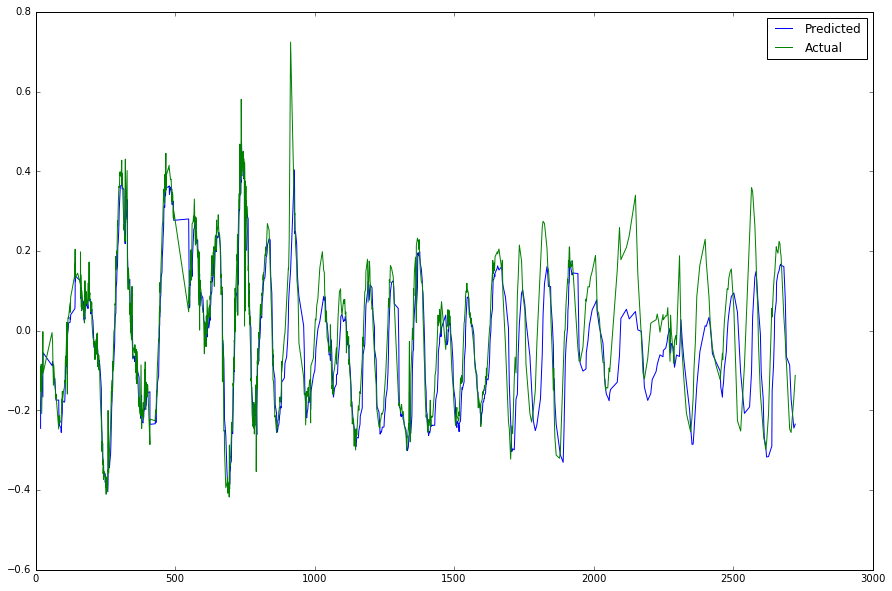

In [177]:
plt.figure(figsize=(15,10))
plt.plot(time_vec, lstm_model.predict(data_mat)[0], label='Predicted')
plt.plot(time_vec, resp_mat, label='Actual')
plt.legend()

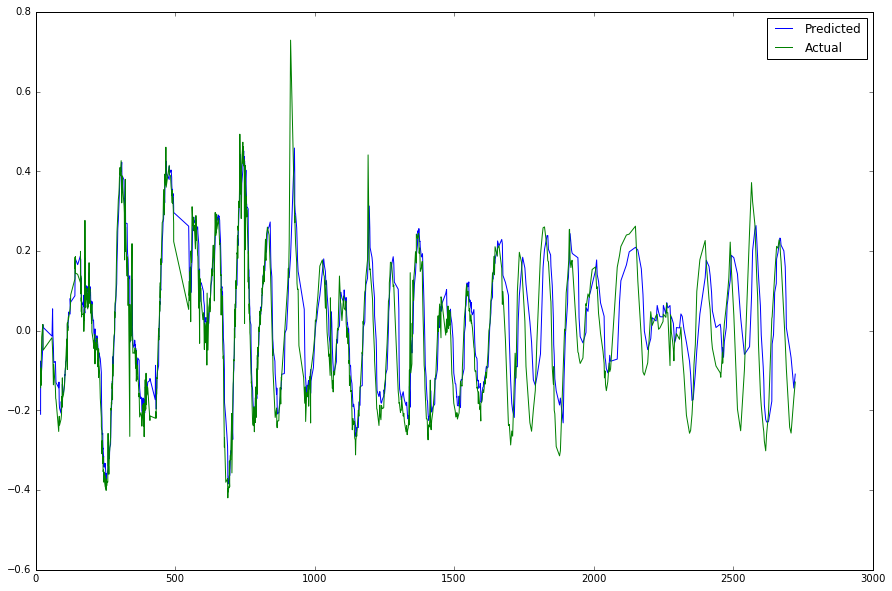

In [173]:
plt.figure(figsize=(15,10))
plt.plot(time_vec, lstm_model.predict(data_mat)[0], label='Predicted')
plt.plot(time_vec, resp_mat, label='Actual')
plt.legend()

#### Test data

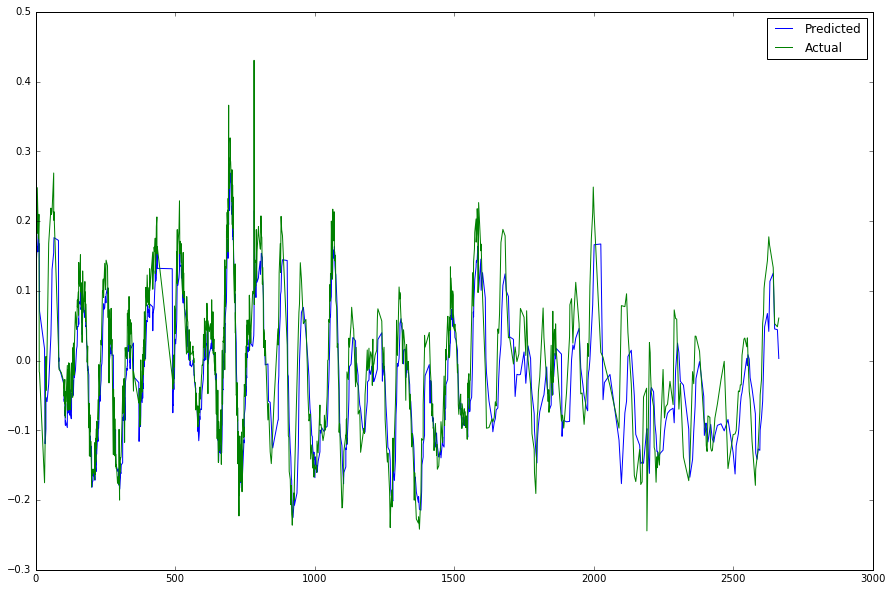

In [105]:
plt.figure(figsize=(15,10))
plt.plot(time_vec, lstm_model.predict(data_mat)[0], label='Predicted')
plt.plot(time_vec, resp_mat, label='Actual')
plt.legend()

#### Training data

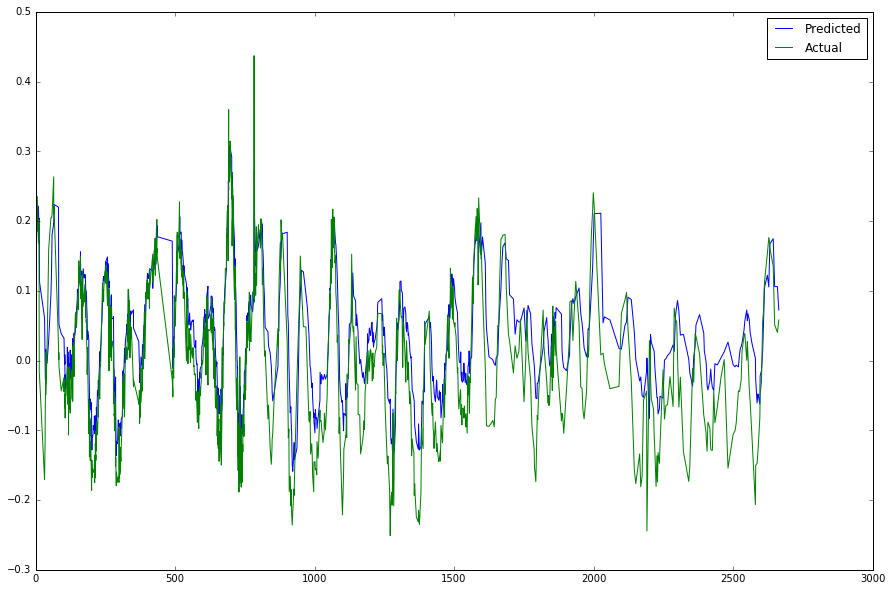

In [99]:
plt.figure(figsize=(15,10))
plt.plot(time_vec, lstm_model.predict(data_mat)[0], label='Predicted')
plt.plot(time_vec, resp_mat, label='Actual')
plt.legend()

In [76]:
def prev_irregular_dataset(data_df, n_prev=2):
    data_arr = np.array(data_df)
    time_irr = data_arr[:,0] - data_arr[0,0]
    data_irr = data_arr[:,1]
    data = pd.DataFrame({"data":data_irr, "response":data_irr})
    data.response = data.response.shift(-1)
    #Not selecting the last point since the response is a Nan
    data = data.iloc[:-1]
    data_mat, resp_mat = _load_data(data, n_prev=n_prev)
    return data_mat, resp_mat, time_irr[n_prev:-1]

In [77]:
data_mat, resp_mat, time_vec = prev_irregular_dataset(data_df, n_prev=5)

In [84]:
lstm_model = basicLSTM(5, num_cells=500)

In [89]:
n_iterations = 1000
for i in range(n_iterations):
    r_cost = lstm_model.train(data_mat, resp_mat, 0.3, 1.0)
    if i%100 == 0:
        print "iteration: %s, cost: %s" % (i, float(r_cost[0]))

iteration: 0, cost: 69.9411596349
iteration: 100, cost: 0.0165461183968
iteration: 200, cost: 0.0164898454284
iteration: 300, cost: 0.0164497439185
iteration: 400, cost: 0.0164099880845
iteration: 500, cost: 0.0163705714405
iteration: 600, cost: 0.0163314910922
iteration: 700, cost: 0.0162927441704
iteration: 800, cost: 0.0162543278304
iteration: 900, cost: 0.0162162392516


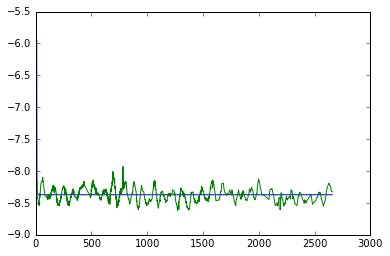

In [90]:
plt.plot(time_vec, lstm_model.predict(data_mat)[0])
plt.plot(time_vec, resp_mat)

#### Multivariate Gaussian data

In [2]:
def mv_data_generation_noise(numPoints, L, n_prev, noiseSD):
    mean = np.zeros(numPoints)
    vec = np.array([[j for j in range(0,numPoints)] for k in range(0,numPoints)])
    covMat = np.exp(-(vec - vec.T)**2/float(L**2))
    noise = np.random.normal(loc=0, scale=noiseSD ,size=numPoints)
    x = np.random.multivariate_normal(mean, covMat, size=(1,))[0] + noise
    time_vec = range(numPoints)
    if n_prev > 1:
        data = pd.DataFrame({"data":x, "response":x})
        data.response = data.response.shift(-1)
        #Not selecting the last point since the response is a Nan
        data = data.iloc[:-1]
        data_mat, resp_mat = _load_data(data, n_prev=n_prev)
    else:
        data = x
        data_rolled = np.roll(data, -1)[:-1]
        data_mat = np.matrix(data[:-1]).T
        resp_mat = np.matrix(data_rolled).T
    return data_mat, resp_mat, time_vec[n_prev:]

In [3]:
L = 20
numPoints = 200
n_prev = 1
data_mat, resp_mat, time_vec = mv_data_generation_noise(numPoints, L, n_prev, 0.2)

/Users/abhishek/anaconda/envs/py_res/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: covariance is not positive-semidefinite.


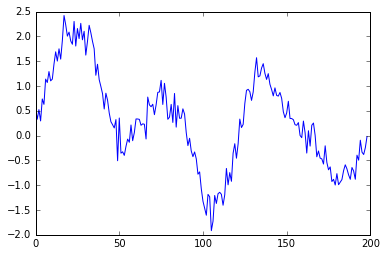

In [4]:
plt.plot(resp_mat)

In [24]:
def mv_data_generation_irregular(numPoints, numSelPoints, L, noiseSD):
    mean = np.zeros(numPoints)
    vec = np.array([[j for j in range(0,numPoints)] for k in range(0,numPoints)])
    covMat = np.exp(-(vec - vec.T)**2/float(L**2))
    noise = np.random.normal(loc=0, scale=noiseSD ,size=numPoints)
    data = np.random.multivariate_normal(mean, covMat, size=(1,))[0] + noise
    time = np.array(range(numPoints))
    index = np.sort(np.random.choice(range(numPoints), size=numSelPoints, replace=False))
    time_irr = time[index]
    data_irr = data[index]
    delta_t = [0] + list(np.array(time_irr[1:]) - np.array(time_irr[:-1]))
    derivative = np.divide(np.diff(data_irr), np.diff(time_irr))
    magDerivative = np.lib.pad(derivative, (1,0), 'constant', constant_values=(0,0))
    dDerivative = np.lib.pad(np.diff(magDerivative), (1,0), 'constant', constant_values=(0,0))
    data_mat = np.matrix([list(data_irr), delta_t, list(magDerivative), list(dDerivative)]).T
    data_mat = data_mat[:-1,:]
    resp_mat = np.matrix(np.roll(data_irr, -1)[:-1]).T
    time_vec = time_irr[1:]
    return data_mat, resp_mat, time_vec

In [40]:
np.random.seed(10)
L = 20
numPoints = 200
numSelPoints = 30
noiseSD = 0.2
data_mat, resp_mat, time_vec = mv_data_generation_irregular(numPoints, numSelPoints,\
                                                        L, noiseSD)

/Users/abhishek/anaconda/envs/py_res/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: covariance is not positive-semidefinite.


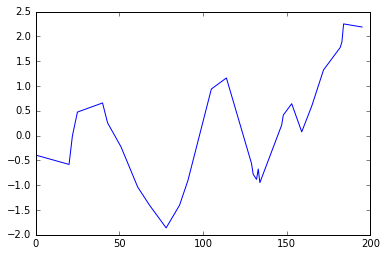

In [41]:
plt.plot(time_vec, resp_mat)

#### Building Impulse data

In [4]:
import scipy

In [2]:
numPoints = 200
data = np.zeros(200)
midPoint = numPoints/2
width = 50
#First half of the impulse
data[midPoint-width:midPoint] = np.exp(np.array(range(-width, 0))/5)
data[midPoint:midPoint+width] = np.exp(np.array(range(-width, 0))/5)[::-1]
data[midPoint] = 1

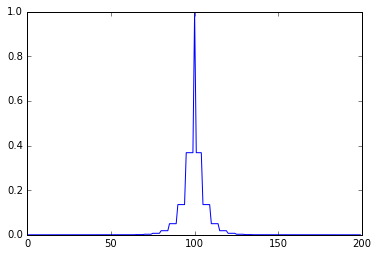

In [3]:
plt.plot(data)

In [5]:
help(scipy.signal.impulse)

Help on function impulse in module scipy.signal.ltisys:

impulse(system, X0=None, T=None, N=None)
    Impulse response of continuous-time system.
    
    Parameters
    ----------
    system : an instance of the LTI class or a tuple of array_like
        describing the system.
        The following gives the number of elements in the tuple and
        the interpretation:
    
            * 2 (num, den)
            * 3 (zeros, poles, gain)
            * 4 (A, B, C, D)
    
    X0 : array_like, optional
        Initial state-vector.  Defaults to zero.
    T : array_like, optional
        Time points.  Computed if not given.
    N : int, optional
        The number of time points to compute (if `T` is not given).
    
    Returns
    -------
    T : ndarray
        A 1-D array of time points.
    yout : ndarray
        A 1-D array containing the impulse response of the system (except for
        singularities at zero).



In [17]:
num = [18] 
den = [1, 6, 1]
k = scipy.signal.impulse((num, den), N=100)

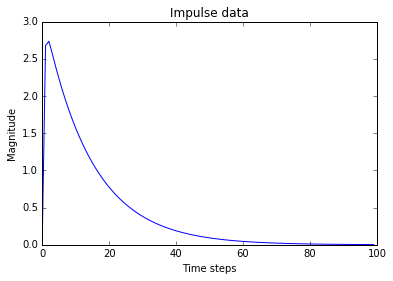

In [22]:
plt.plot(k[1])
plt.xlabel('Time steps')
plt.ylabel('Magnitude')
plt.title('Impulse data')